In [57]:
!jupyter nbconvert misc.ipynb --to python --no-prompt

[NbConvertApp] Converting notebook misc.ipynb to python
[NbConvertApp] Writing 5055 bytes to misc.py


In [49]:
import IPython.display as ipyd
import ipywidgets as ipyw

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.ioff()

In [48]:
#
# ipywidget animation example
#
play = ipyw.Play(
    interval=100,
    value=23,
    min=0,
    max=100,
)
slider = ipyw.IntSlider()
ipyw.jslink((play, 'value'), (slider, 'value'))
ipyd.display(play, slider)

Play(value=23)

IntSlider(value=0)

In [53]:
#
# ipywidget "interact" example
#

fig, ax = plt.subplots(figsize=(6, 6))

@ipyw.interact(N=(10,200,10))
def __(*, N=50):
    u = np.random.rand(N)
    u_rad = 2 * np.pi * u
    cos = np.cos(u_rad)    
    sin = np.sin(u_rad)
    
    lim = np.array([-1, 1]) * 1.5
    ax.clear()
    ax.set(aspect=1, xlim=lim, ylim=lim)
    ax.grid()
    ax.scatter(cos, sin)
    ipyd.display(fig)

interactive(children=(IntSlider(value=50, description='N', max=200, min=10, step=10), Output()), _dom_classes=…

Backward propagation of _solve_

---

$
\text{solve}: \text{Invertibles}(F^{n \times n}) \times F^{n \times k} \to F^{n \times k}
$

$
X = \text{solve}(A, B) = A^{-1} B
$

where

$
A \in \text{Invertibles}(F^{n \times n})
$

$
X, B \in F^{n \times k}
$


---

For $f: F^{n \times k} \to F$, we write:

$
G_{X, i, j} \equiv \mathbf{D}_{X_{i, j}}f(X)
\in F^{n \times k}
$

Then,

$
\begin{align}
\mathbf{D}_{B_{i, j}}f(X)
&= \sum_{k, l} \mathbf{D}_{X_{k, l}}f(X) \;\; \mathbf{D}_{B_{i, j}}(A^{-1} B)_{k, l} \\
&= \text{Tr}(G_{X}^T \; A^{-1} \; \delta_{i, j}) \\
&= (G_{X}^T \; A^{-1})^T \\
&= (A^{T})^{-1} \; G_{X}
\end{align}
$

Convinient tricks

Define

$
\Delta_{i, j} \in F^{n \times n} 
$

s.t. 

$
(\Delta_{i, j})_{k, l} \equiv
\begin{cases}
1 &\text{if $i = k$ and $j = l$,} \\
0 &\text{o.w.}
\end{cases}
$

$
\begin{align}
\end{align}
$

1.

$
\begin{align}
\sum_{i, j} X_{i, j} Y_{i, j} 
&= \text{Tr}(X^T Y) \\
&= \text{Tr}(Y \; X^T) \\
&= \text{Tr}(Y^T X) \\
&= \text{Tr}(X \; Y^T)
\end{align}
$

2.

$
\begin{align}
X_{i, j} = \text{Tr}(X^T \Delta_{i, j})
\end{align}
$

3.

$
\mathbf{D}_{X_{i, j}} X = \Delta_{i, j}
$

4.

$
\mathbf{D}_{X_{i, j}} A \; X = A \; \Delta_{i, j}
$

5.

$
\begin{align}
\mathbf{D}_{X_{i, j}} f(A \; X)
&= \sum_{k, l} \; \mathbf{D}_{Y, k, l} f(Y) \;\; \mathbf{D}_{X_{i, j}} (A \; X)_{k, l} \\
&= \text{Tr}( (\mathbf{D}_{Y} f(Y))^T \;\; A \;\; \Delta_{i, j}) \\
&= ((\mathbf{D}_{Y} f(Y))^T \;\; A)^T \\
&= A^T \;\; \mathbf{D}_{Y} f(Y)
\end{align}
$

In [21]:
import torch

torch.arange(-1, 1, 10)

tensor([-1])

In [22]:
torch.arange?

In [4]:
import numpy as np

np.random.randn(1)

array([-0.53487208])

In [20]:
# BitGenerator (PCG64)
# Generator

# - Get BitGenerator (PCG64) state

# - Use bitgen interface directly

# what is seed_seq??

In [18]:
npr = np.random.default_rng()
npr.normal(size=(3, 5))

array([[ 0.97551276,  0.30821853, -0.13703771,  0.50582108, -0.48812156],
       [-2.53838446,  0.36657252, -0.31006423, -0.62307403,  0.01930944],
       [ 0.61189898,  1.09066519, -0.30049501,  0.88724888,  0.15787942]])

In [426]:
#
# lstsq example
# TODO:
# - what is QR here? where does QR come from?
# - what is z here?
#
import torch

A = torch.randn(5, 3)
b = torch.randn(5)
solution, QR = torch.lstsq(b, A)

x, z = torch.split(solution, A.size(1))
residue = A @ x.reshape(-1) - b

assert torch.allclose(torch.norm(residue), torch.norm(z))

A, b, solution, residue, QR

(tensor([[ 0.5342, -1.0581,  0.5523],
         [-0.6951,  2.0100, -0.8505],
         [ 0.4663, -0.9259,  0.0180],
         [-0.3541,  1.0957, -0.7989],
         [ 1.5767,  0.1517,  0.3825]]),
 tensor([-0.8864,  0.8369, -0.3389, -1.9326, -0.7079]),
 tensor([[-1.1458],
         [ 0.7739],
         [ 2.4962],
         [-1.7590],
         [ 0.3812]]),
 tensor([ 0.8343, -0.6081, -0.8672,  1.1920, -0.0266]),
 tensor([[-1.8967,  1.3407, -0.9388],
         [-0.2859, -2.3331,  0.8013],
         [ 0.1918, -0.1274,  0.5386],
         [-0.1457,  0.2041,  0.3445],
         [ 0.6486,  0.4669,  0.0130]]))

In [455]:
#
# lu (cf. torch.functional.lu_unpack)
#
w = torch.randn(5, 5)
lu, pivot = torch.lu(w)
w, lu, pivot

(tensor([[ 0.0526,  2.2309,  1.6819, -0.2006,  0.6520],
         [ 0.3124, -0.7294,  0.5750,  1.0441,  0.5678],
         [ 0.1699, -0.6788, -0.1659, -0.1340, -0.9474],
         [ 0.1072, -1.0232, -0.9661,  0.5397,  0.9488],
         [ 1.3424,  0.8977,  0.1882,  1.9649, -2.0642]]),
 tensor([[ 1.3424,  0.8977,  0.1882,  1.9649, -2.0642],
         [ 0.0392,  2.1957,  1.6745, -0.2776,  0.7330],
         [ 0.2327, -0.4274,  1.2468,  0.4682,  1.3614],
         [ 0.1266, -0.3609,  0.3325, -0.6385, -0.8744],
         [ 0.0798, -0.4986, -0.1172, -0.4688,  1.2287]]),
 tensor([5, 5, 5, 5, 5], dtype=torch.int32))

In [487]:
#
# lu_solve
#
b = torch.randn(5, 2)
x = torch.lu_solve(b, lu, pivot)
b, ' '*20, x, w @ x

(tensor([[-0.7497, -0.0092],
         [ 0.5049,  1.0593],
         [-0.4481, -1.6084],
         [ 1.4067,  0.2842],
         [ 0.0650,  1.1695]]),
 '                    ',
 tensor([[ 0.2827, -6.3358],
         [ 0.0245,  0.8581],
         [-0.6451, -0.2529],
         [ 0.4709,  3.9583],
         [ 0.5524, -0.5687]]),
 tensor([[-0.7497, -0.0092],
         [ 0.5049,  1.0593],
         [-0.4481, -1.6084],
         [ 1.4067,  0.2842],
         [ 0.0650,  1.1695]]))

Latex Macros

$
\newcommand{\iprod}[2] { \langle #1, #2 \rangle }
$

- `\iprod{x}{y}` $\iprod{x}{y}$

$$
\begin{align}
f(x) &= \frac{1}{2} \iprod{x}{Ax} - \iprod{b}{x} \\
g(x) &= Df_x = Ax - b
\end{align}
$$

$$
\begin{align}
r_{k+1} &= g(x) = A x_{k} - b \\
p_{k+1} &= r_{k+1} - \sum_{i \leq k} \frac{\iprod{p_i}{r_{k+1}}}{\iprod{p_i}{p_i}} p_i \\
x_{k+1} &= x_k + \alpha_{k+1} p_{k+1} \\
&\text{where} \;
\alpha_{k+1} = \text{argmin}_{\alpha}{f(x + \alpha p_{k+1})} \\
&(i.e. D_{\alpha}f(x + \alpha p_{k+1}) = 0)
\end{align}
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

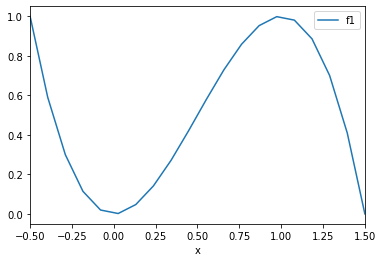

In [21]:
# Interpolate
# f(0) = 0  f'(0) = 0
# f(1) = 1  f'(1) = 0

x = np.linspace(-.5, 1.5, 20)
y = - 2 * (x ** 3) + 3 * (x ** 2)

df = pd.DataFrame({'x': x, 'f1': y })
df.plot.line(x='x', y='f1')

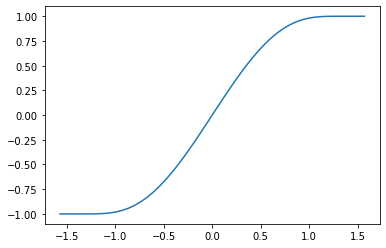

In [56]:
x = np.linspace(- np.pi / 2, np.pi / 2)
y = np.tanh((1.5) * np.tan(x))
plt.plot(x, y)

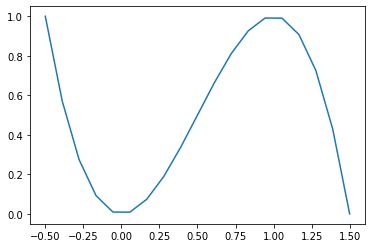

<Figure size 432x288 with 0 Axes>

In [34]:
# Simple animation on notebook

import numpy as np
import matplotlib.pyplot as plt
import IPython
import time

fig, ax = plt.subplots()

for N in range(5, 20):
    x = np.linspace(-.5, 1.5, N)
    y = - 2 * (x ** 3) + 3 * (x ** 2)
    fig.clear()
    ax.plot(x, y)
    fig.add_axes(ax)
    IPython.display.clear_output(wait=True)
    IPython.display.display(fig)
    time.sleep(0.1)

fig.clear()

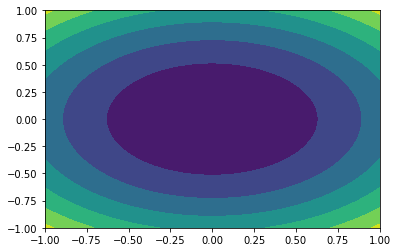

In [67]:
# Contour plot 2-dim quadratic form

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
xx, yy = np.meshgrid(x, y)

Q11 = 1
Q22 = 1.5
z = Q11 * xx ** 2 + Q22 * yy ** 2

plt.contourf(x, y, z)
None